# Generative Adversarial Networks (GANs)

GANs are trained in a self-supervised process where a discriminator tries to determine whether a data point is real data or one that is generated.

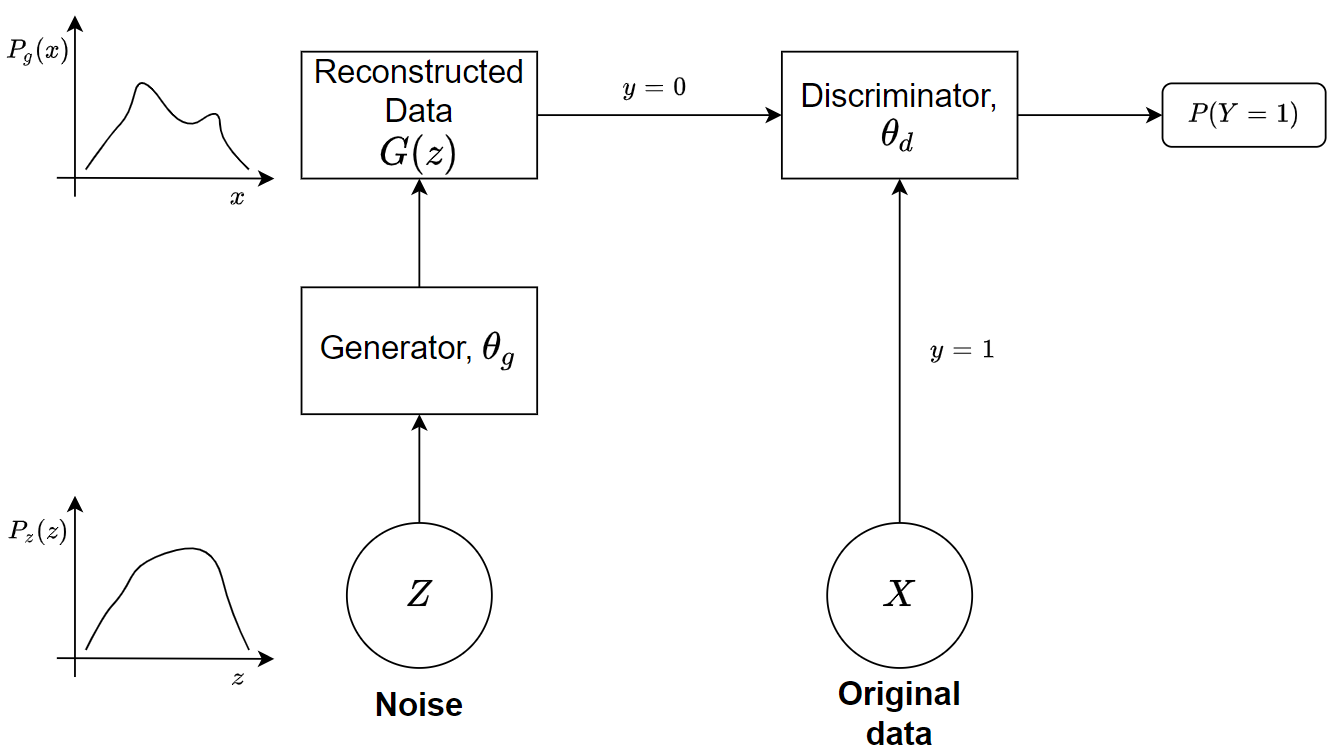

In [1]:
from utils import disp
disp('gan_architecture.png')

The GAN uses a value function (minmax problem) to learn.

$$min_G max_D V(G,D) = E_{X\sim P_data} ln(D(x)) + E_{Z\sim P_Z} ln(1-D(G(z)))$$

We optimize the loss function using a loss function (i.e. stochastic gradient descent). The training process is generally structured as follows:

1. *Fix the learning of G*
2. Inner loop on D k times
   
   a. Take $m$ data samples & m fake data samples

   b. Update $\theta_d$ by gradient ascent (because discriminator is trying to maximize the value function)

$$\frac{d}{d\theta_d} \frac{1}{m} [ln(D(x)) + ln(1 - D(G(z))) ]$$

3. *Fix learning of D*
   
   a. Take m fake data samples

   b. Update $\theta_g$ by gradient descent

$$\frac{d}{d\theta_g} \frac{1}{m} [ln(1 - D(G(z)))]$$

For every $k$ updates of D, we update G once.

The goal is to make $P_G$ converge to $P_{data}$. Here, we assume that $P_G$ is equal to $P_{data}$ at the global minimum. To prove this, 

For fixed G,

$$V(G,D) = \int_x p_{data}(x) ln(D(x)) + p_g (x) ln(1 - D(x)) dx$$

will be maximum for $D(x) = \frac{p_{data}(x)}{p_{data}(x) + p_g(x)}$

Fixing D as this maximum, we can plug into our value function 

$$min_G V = E_{x\sim p_data} ln(\frac{p_{data}(x)}{p_{data}(x) + p_g(x)}) + E_{x\sim p_g} ln(1 - \frac{p_{data}(x)}{p_{data}(x) + p_g(x)})$$

$$= E_{x\sim p_{data}} ln(\frac{p_{data}(x)}{p_{data}(x) + p_g(x)}) + E_{x\sim p_g} ln(\frac{p_{data}(x)}{p_{data}(x) + p_g(x)})$$

From here, we want to prove that pdf of G is the same as pdf of data. To measure the difference between two distributions, we can use **JS divergence**.

$$JS(p_1 | p_2) = \frac{1}{2} E_{x\sim p_1} ln(\frac{p_1}{\frac{p_1 + p_2}{2}}) + \frac{1}{2} E_{x\sim p_2} (\frac{p_2}{\frac{p_1+p_2}{2}})$$

This is close to the previous expression. With some modifications, we get

$$min_G V = E_{x\sim p_{data}} ln(\frac{p_{data}(x)}{\frac{p_{data}(x) + p_g(x)}{2}}) + E_{x\sim p_g} ln(\frac{p_{data}(x)}{\frac{p_{data}(x) + p_g(x)}{2}}) - 2ln2$$

$$min_G V = 2 JS(p_data | p_g) - 2ln2$$

What is minimum value of this expression? JS cannot be negative. It can only be zero when $p_{data} = p_g$. If this occurs, then our minimum is $min_G V = -2ln2$.

Once the generator is trained, the discriminator will not be able to tell which data point is original and which is generated. So, the discriminator will output 0.5 for every input (theoretically).



## Thought experiment: GANs for explainable AI?

GANs should be helpful for explainable AI.

Normal implemnntation:

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

118it [00:10, 12.12it/s]                         


Epoch 0 of 200
Generator loss: 1.42679989, Discriminator loss: 0.98298115


118it [00:10, 10.82it/s]                         


Epoch 1 of 200
Generator loss: 1.62489319, Discriminator loss: 0.70377380


118it [00:10, 12.19it/s]                         


Epoch 2 of 200
Generator loss: 3.10378194, Discriminator loss: 0.70644265


118it [00:10, 12.16it/s]                         


Epoch 3 of 200
Generator loss: 4.92797756, Discriminator loss: 1.26403916


118it [00:10, 11.90it/s]                         


Epoch 4 of 200
Generator loss: 3.85051537, Discriminator loss: 0.34978214


118it [00:10, 10.73it/s]                         


Epoch 5 of 200
Generator loss: 4.61972666, Discriminator loss: 0.26378199


118it [00:10, 10.79it/s]                         


Epoch 6 of 200
Generator loss: 4.38954210, Discriminator loss: 0.36163151


118it [00:10, 12.21it/s]                         


Epoch 7 of 200
Generator loss: 4.36764336, Discriminator loss: 0.45374233


118it [00:10, 12.28it/s]                         


Epoch 8 of 200
Generator loss: 3.98004150, Discriminator loss: 0.61882484


118it [00:10, 12.31it/s]                         


Epoch 9 of 200
Generator loss: 2.88338304, Discriminator loss: 0.70212597


118it [00:10, 12.20it/s]                         


Epoch 10 of 200
Generator loss: 3.22872758, Discriminator loss: 0.73741198


118it [00:10, 10.97it/s]                         


Epoch 11 of 200
Generator loss: 3.26948786, Discriminator loss: 0.62486356


118it [00:10, 10.92it/s]                         


Epoch 12 of 200
Generator loss: 3.41106462, Discriminator loss: 0.41624784


118it [00:10, 12.09it/s]                         


Epoch 13 of 200
Generator loss: 3.96793866, Discriminator loss: 0.48023599


118it [00:10, 10.98it/s]                         


Epoch 14 of 200
Generator loss: 3.39452696, Discriminator loss: 0.40835723


118it [00:10, 11.98it/s]                         


Epoch 15 of 200
Generator loss: 3.72954559, Discriminator loss: 0.32693329


118it [00:10, 12.20it/s]                         


Epoch 16 of 200
Generator loss: 4.63171339, Discriminator loss: 0.35380819


118it [00:10, 10.95it/s]                         


Epoch 17 of 200
Generator loss: 3.63302135, Discriminator loss: 0.40510964


118it [00:10, 12.04it/s]                         


Epoch 18 of 200
Generator loss: 3.70032191, Discriminator loss: 0.36745089


118it [00:10, 12.15it/s]                         


Epoch 19 of 200
Generator loss: 3.79039121, Discriminator loss: 0.47844118


118it [00:10, 11.89it/s]                         


Epoch 20 of 200
Generator loss: 3.54762769, Discriminator loss: 0.30928752


118it [00:10, 12.22it/s]                         


Epoch 21 of 200
Generator loss: 3.71710515, Discriminator loss: 0.38970572


118it [00:10, 12.20it/s]                         


Epoch 22 of 200
Generator loss: 3.31698275, Discriminator loss: 0.52958453


118it [00:11, 10.69it/s]                         


Epoch 23 of 200
Generator loss: 3.57484317, Discriminator loss: 0.55633307


118it [00:11, 10.55it/s]                         


Epoch 24 of 200
Generator loss: 3.25523281, Discriminator loss: 0.51782972


118it [00:10, 12.00it/s]                         


Epoch 25 of 200
Generator loss: 3.18583012, Discriminator loss: 0.47012895


118it [00:10, 12.14it/s]                         


Epoch 26 of 200
Generator loss: 3.19335461, Discriminator loss: 0.51145601


118it [00:10, 12.10it/s]                         


Epoch 27 of 200
Generator loss: 3.21174383, Discriminator loss: 0.56492382


118it [00:10, 12.13it/s]                         


Epoch 28 of 200
Generator loss: 3.45740318, Discriminator loss: 0.48976579


118it [00:10, 12.14it/s]                         


Epoch 29 of 200
Generator loss: 3.05499339, Discriminator loss: 0.57028377


118it [00:10, 11.98it/s]                         


Epoch 30 of 200
Generator loss: 2.88134313, Discriminator loss: 0.55931473


118it [00:10, 12.14it/s]                         


Epoch 31 of 200
Generator loss: 3.24226332, Discriminator loss: 0.51059788


118it [00:10, 12.09it/s]                         


Epoch 32 of 200
Generator loss: 2.86517239, Discriminator loss: 0.63791561


118it [00:10, 12.02it/s]                         


Epoch 33 of 200
Generator loss: 2.45503569, Discriminator loss: 0.68121541


118it [00:10, 12.02it/s]                         


Epoch 34 of 200
Generator loss: 2.83101821, Discriminator loss: 0.51598758


118it [00:10, 10.88it/s]                         


Epoch 35 of 200
Generator loss: 3.05535507, Discriminator loss: 0.49450979


118it [00:10, 11.66it/s]                         


Epoch 36 of 200
Generator loss: 3.04819036, Discriminator loss: 0.50154257


118it [00:10, 10.93it/s]                         


Epoch 37 of 200
Generator loss: 3.18599129, Discriminator loss: 0.46228018


118it [00:10, 12.20it/s]                         


Epoch 38 of 200
Generator loss: 3.08141351, Discriminator loss: 0.50581169


118it [00:10, 12.07it/s]                         


Epoch 39 of 200
Generator loss: 2.89046168, Discriminator loss: 0.54147011


118it [00:10, 11.00it/s]                         


Epoch 40 of 200
Generator loss: 3.11255932, Discriminator loss: 0.54231316


118it [00:10, 12.05it/s]                         


Epoch 41 of 200
Generator loss: 2.69802594, Discriminator loss: 0.55339050


118it [00:10, 11.79it/s]                         


Epoch 42 of 200
Generator loss: 3.06265306, Discriminator loss: 0.51745349


118it [00:10, 10.87it/s]                         


Epoch 43 of 200
Generator loss: 2.89635634, Discriminator loss: 0.49023831


118it [00:10, 12.13it/s]                         


Epoch 44 of 200
Generator loss: 2.85235381, Discriminator loss: 0.54068846


118it [00:10, 12.14it/s]                         


Epoch 45 of 200
Generator loss: 2.77114344, Discriminator loss: 0.57422400


118it [00:10, 12.08it/s]                         


Epoch 46 of 200
Generator loss: 2.94623184, Discriminator loss: 0.50683928


118it [00:10, 12.12it/s]                         


Epoch 47 of 200
Generator loss: 2.51394677, Discriminator loss: 0.66653192


118it [00:10, 12.05it/s]                         


Epoch 48 of 200
Generator loss: 2.32383966, Discriminator loss: 0.68538570


118it [00:11, 12.04it/s]                         


Epoch 49 of 200
Generator loss: 2.57492971, Discriminator loss: 0.61851585


118it [00:10, 12.13it/s]                         


Epoch 50 of 200
Generator loss: 2.47522569, Discriminator loss: 0.60982305


118it [00:10, 12.16it/s]                         


Epoch 51 of 200
Generator loss: 2.36268973, Discriminator loss: 0.64775735


118it [00:10, 12.05it/s]                         


Epoch 52 of 200
Generator loss: 2.54246497, Discriminator loss: 0.58563745


118it [00:10, 10.92it/s]                         


Epoch 53 of 200
Generator loss: 2.59760189, Discriminator loss: 0.61331671


118it [00:10, 12.11it/s]                         


Epoch 54 of 200
Generator loss: 2.66271830, Discriminator loss: 0.60149300


118it [00:10, 12.17it/s]                         


Epoch 55 of 200
Generator loss: 2.57131219, Discriminator loss: 0.62431341


118it [00:10, 11.98it/s]                         


Epoch 56 of 200
Generator loss: 2.45217991, Discriminator loss: 0.64607465


118it [00:10, 10.92it/s]                         


Epoch 57 of 200
Generator loss: 2.45755219, Discriminator loss: 0.67585933


118it [00:10, 12.11it/s]                         


Epoch 58 of 200
Generator loss: 2.52498460, Discriminator loss: 0.62965387


118it [00:10, 10.88it/s]                         


Epoch 59 of 200
Generator loss: 2.40800285, Discriminator loss: 0.66435039


118it [00:10, 10.87it/s]                         


Epoch 60 of 200
Generator loss: 2.32626867, Discriminator loss: 0.70449632


118it [00:10, 11.75it/s]                         


Epoch 61 of 200
Generator loss: 2.38575864, Discriminator loss: 0.67307276


118it [00:10, 12.06it/s]                         


Epoch 62 of 200
Generator loss: 2.46737528, Discriminator loss: 0.61570835


118it [00:10, 12.14it/s]                         


Epoch 63 of 200
Generator loss: 2.42095017, Discriminator loss: 0.70034283


118it [00:10, 11.89it/s]                         


Epoch 64 of 200
Generator loss: 2.31449914, Discriminator loss: 0.65447074


118it [00:10, 12.01it/s]                         


Epoch 65 of 200
Generator loss: 2.39653182, Discriminator loss: 0.60882252


118it [00:10, 12.02it/s]                         


Epoch 66 of 200
Generator loss: 2.37150860, Discriminator loss: 0.68175209


118it [00:10, 11.57it/s]                         


Epoch 67 of 200
Generator loss: 2.28956985, Discriminator loss: 0.69170892


118it [00:10, 12.00it/s]                         


Epoch 68 of 200
Generator loss: 2.57752275, Discriminator loss: 0.64327300


118it [00:10, 12.18it/s]                         


Epoch 69 of 200
Generator loss: 2.37329602, Discriminator loss: 0.71189284


118it [00:10, 12.09it/s]                         


Epoch 70 of 200
Generator loss: 2.16448283, Discriminator loss: 0.69848782


118it [00:10, 11.93it/s]                         


Epoch 71 of 200
Generator loss: 2.34472179, Discriminator loss: 0.67156476


118it [00:10, 12.10it/s]                         


Epoch 72 of 200
Generator loss: 2.17551994, Discriminator loss: 0.69883925


118it [00:10, 12.05it/s]                         


Epoch 73 of 200
Generator loss: 2.17170811, Discriminator loss: 0.70166582


118it [00:10, 12.08it/s]                         


Epoch 74 of 200
Generator loss: 2.05627131, Discriminator loss: 0.76419610


118it [00:10, 11.90it/s]                         


Epoch 75 of 200
Generator loss: 2.27301955, Discriminator loss: 0.66036499


118it [00:10, 11.71it/s]                         


Epoch 76 of 200
Generator loss: 2.28018999, Discriminator loss: 0.69041985


118it [00:10, 12.02it/s]                         


Epoch 77 of 200
Generator loss: 2.20005488, Discriminator loss: 0.70438713


118it [00:10, 10.90it/s]                         


Epoch 78 of 200
Generator loss: 2.27268672, Discriminator loss: 0.65581048


118it [00:10, 10.79it/s]                         


Epoch 79 of 200
Generator loss: 2.36812997, Discriminator loss: 0.68771487


118it [00:11, 11.57it/s]                         


Epoch 80 of 200
Generator loss: 2.19527173, Discriminator loss: 0.69965822


118it [00:10, 11.87it/s]                         


Epoch 81 of 200
Generator loss: 2.38353372, Discriminator loss: 0.67542112


118it [00:10, 10.83it/s]                         


Epoch 82 of 200
Generator loss: 2.00821018, Discriminator loss: 0.77538747


118it [00:10, 11.75it/s]                         


Epoch 83 of 200
Generator loss: 2.06199837, Discriminator loss: 0.72377205


118it [00:10, 10.89it/s]                         


Epoch 84 of 200
Generator loss: 2.10705400, Discriminator loss: 0.73932397


118it [00:10, 12.01it/s]                         


Epoch 85 of 200
Generator loss: 2.16597724, Discriminator loss: 0.72270906


118it [00:10, 12.11it/s]                         


Epoch 86 of 200
Generator loss: 2.15547657, Discriminator loss: 0.72369409


118it [00:10, 12.07it/s]                         


Epoch 87 of 200
Generator loss: 1.98006141, Discriminator loss: 0.77487230


118it [00:10, 12.10it/s]                         


Epoch 88 of 200
Generator loss: 2.17026782, Discriminator loss: 0.71066028


118it [00:10, 10.85it/s]                         


Epoch 89 of 200
Generator loss: 2.10151815, Discriminator loss: 0.71836138


118it [00:10, 12.10it/s]                         


Epoch 90 of 200
Generator loss: 2.15137696, Discriminator loss: 0.70107192


118it [00:10, 10.76it/s]                         


Epoch 91 of 200
Generator loss: 2.13201833, Discriminator loss: 0.71878541


118it [00:10, 12.08it/s]                         


Epoch 92 of 200
Generator loss: 2.12932873, Discriminator loss: 0.69973910


118it [00:10, 12.03it/s]                         


Epoch 93 of 200
Generator loss: 2.10871553, Discriminator loss: 0.74259883


118it [00:10, 12.06it/s]                         


Epoch 94 of 200
Generator loss: 2.17168546, Discriminator loss: 0.69877094


118it [00:11, 11.87it/s]                         


Epoch 95 of 200
Generator loss: 2.05657387, Discriminator loss: 0.76476651


118it [00:11, 11.83it/s]                         


Epoch 96 of 200
Generator loss: 1.95592308, Discriminator loss: 0.76803041


118it [00:11, 11.70it/s]                         


Epoch 97 of 200
Generator loss: 2.10769629, Discriminator loss: 0.70019478


118it [00:10, 12.07it/s]                         


Epoch 98 of 200
Generator loss: 1.97890449, Discriminator loss: 0.73829842


118it [00:10, 12.10it/s]                         


Epoch 99 of 200
Generator loss: 1.90354776, Discriminator loss: 0.80168343


118it [00:10, 12.09it/s]                         


Epoch 100 of 200
Generator loss: 1.97588968, Discriminator loss: 0.78837484


118it [00:10, 10.86it/s]                         


Epoch 101 of 200
Generator loss: 1.93798590, Discriminator loss: 0.80875230


118it [00:10, 12.08it/s]                         


Epoch 102 of 200
Generator loss: 1.96531487, Discriminator loss: 0.78535426


118it [00:10, 10.75it/s]                         


Epoch 103 of 200
Generator loss: 1.86302114, Discriminator loss: 0.76587468


118it [00:10, 10.80it/s]                         


Epoch 104 of 200
Generator loss: 1.93535113, Discriminator loss: 0.77565098


118it [00:10, 11.95it/s]                         


Epoch 105 of 200
Generator loss: 1.99481142, Discriminator loss: 0.74644858


118it [00:10, 12.06it/s]                         


Epoch 106 of 200
Generator loss: 1.92222798, Discriminator loss: 0.75295651


118it [00:10, 11.93it/s]                         


Epoch 107 of 200
Generator loss: 1.98527122, Discriminator loss: 0.76719052


118it [00:10, 12.05it/s]                         


Epoch 108 of 200
Generator loss: 1.88296998, Discriminator loss: 0.75847024


118it [00:10, 12.18it/s]                         


Epoch 109 of 200
Generator loss: 1.91546285, Discriminator loss: 0.79423177


118it [00:10, 12.04it/s]                         


Epoch 110 of 200
Generator loss: 2.05347419, Discriminator loss: 0.78333181


118it [00:10, 11.95it/s]                         


Epoch 111 of 200
Generator loss: 1.98762047, Discriminator loss: 0.74812883


118it [00:10, 11.90it/s]                         


Epoch 112 of 200
Generator loss: 2.00333953, Discriminator loss: 0.75139976


118it [00:10, 10.78it/s]                         


Epoch 113 of 200
Generator loss: 1.93170142, Discriminator loss: 0.73702711


118it [00:10, 12.06it/s]                         


Epoch 114 of 200
Generator loss: 1.93748260, Discriminator loss: 0.77334636


118it [00:11, 12.00it/s]                         


Epoch 115 of 200
Generator loss: 1.93474305, Discriminator loss: 0.76822644


118it [00:10, 10.77it/s]                         


Epoch 116 of 200
Generator loss: 1.93480587, Discriminator loss: 0.78705817


118it [00:10, 11.94it/s]                         


Epoch 117 of 200
Generator loss: 1.81781912, Discriminator loss: 0.80566841


118it [00:10, 12.09it/s]                         


Epoch 118 of 200
Generator loss: 1.90504992, Discriminator loss: 0.74386704


118it [00:10, 11.88it/s]                         


Epoch 119 of 200
Generator loss: 1.86636162, Discriminator loss: 0.76808059


118it [00:10, 12.02it/s]                         


Epoch 120 of 200
Generator loss: 1.93788433, Discriminator loss: 0.75187492


118it [00:10, 11.95it/s]                         


Epoch 121 of 200
Generator loss: 1.75950122, Discriminator loss: 0.80740660


118it [00:11, 12.00it/s]                         


Epoch 122 of 200
Generator loss: 1.73203480, Discriminator loss: 0.84196305


118it [00:10, 11.94it/s]                         


Epoch 123 of 200
Generator loss: 1.83940530, Discriminator loss: 0.80670452


118it [00:10, 11.90it/s]                         


Epoch 124 of 200
Generator loss: 1.80591881, Discriminator loss: 0.78669566


118it [00:10, 11.86it/s]                         


Epoch 125 of 200
Generator loss: 1.84839618, Discriminator loss: 0.77231079


118it [00:11, 10.45it/s]                         


Epoch 126 of 200
Generator loss: 1.82202017, Discriminator loss: 0.80033922


118it [00:11, 12.02it/s]                         


Epoch 127 of 200
Generator loss: 1.82240641, Discriminator loss: 0.80433965


118it [00:10, 10.82it/s]                         


Epoch 128 of 200
Generator loss: 1.78250694, Discriminator loss: 0.78977102


118it [00:10, 11.96it/s]                         


Epoch 129 of 200
Generator loss: 1.73686993, Discriminator loss: 0.83117014


118it [00:10, 10.81it/s]                         


Epoch 130 of 200
Generator loss: 1.69894624, Discriminator loss: 0.83944160


118it [00:10, 11.58it/s]                         


Epoch 131 of 200
Generator loss: 1.70522535, Discriminator loss: 0.83726037


118it [00:10, 12.03it/s]                         


Epoch 132 of 200
Generator loss: 1.63788044, Discriminator loss: 0.82422584


118it [00:11, 10.69it/s]                         


Epoch 133 of 200
Generator loss: 1.68943703, Discriminator loss: 0.79931623


118it [00:10, 12.04it/s]                         


Epoch 134 of 200
Generator loss: 1.77729273, Discriminator loss: 0.82075375


118it [00:10, 11.92it/s]                         


Epoch 135 of 200
Generator loss: 1.68428946, Discriminator loss: 0.82309252


118it [00:10, 11.99it/s]                         


Epoch 136 of 200
Generator loss: 1.67224669, Discriminator loss: 0.82916367


118it [00:10, 12.03it/s]                         


Epoch 137 of 200
Generator loss: 1.72521901, Discriminator loss: 0.83404922


118it [00:10, 10.75it/s]                         


Epoch 138 of 200
Generator loss: 1.78916895, Discriminator loss: 0.80936950


118it [00:11, 11.95it/s]                         


Epoch 139 of 200
Generator loss: 1.75150931, Discriminator loss: 0.83272260


118it [00:11, 11.77it/s]                         


Epoch 140 of 200
Generator loss: 1.76419652, Discriminator loss: 0.81509191


118it [00:11, 11.38it/s]                         


Epoch 141 of 200
Generator loss: 1.77207625, Discriminator loss: 0.80571991


118it [00:10, 12.01it/s]                         


Epoch 142 of 200
Generator loss: 1.68275905, Discriminator loss: 0.82235527


118it [00:10, 10.74it/s]                         


Epoch 143 of 200
Generator loss: 1.76718843, Discriminator loss: 0.80837804


118it [00:11, 11.75it/s]                         


Epoch 144 of 200
Generator loss: 1.65909672, Discriminator loss: 0.85105503


118it [00:11, 10.62it/s]                         


Epoch 145 of 200
Generator loss: 1.71078217, Discriminator loss: 0.80839849


118it [00:11, 12.06it/s]                         


Epoch 146 of 200
Generator loss: 1.73700798, Discriminator loss: 0.83374196


118it [00:11, 10.64it/s]                         


Epoch 147 of 200
Generator loss: 1.56826782, Discriminator loss: 0.86148900


118it [00:10, 12.03it/s]                         


Epoch 148 of 200
Generator loss: 1.71385252, Discriminator loss: 0.83115745


118it [00:11, 10.63it/s]                         


Epoch 149 of 200
Generator loss: 1.70669937, Discriminator loss: 0.84008586


118it [00:11, 10.67it/s]                         


Epoch 150 of 200
Generator loss: 1.76197851, Discriminator loss: 0.81925625


118it [00:11, 10.39it/s]                         


Epoch 151 of 200
Generator loss: 1.68872285, Discriminator loss: 0.86071086


118it [00:11, 10.43it/s]                         


Epoch 152 of 200
Generator loss: 1.68789732, Discriminator loss: 0.83586329


118it [00:11, 10.33it/s]                         


Epoch 153 of 200
Generator loss: 1.63197529, Discriminator loss: 0.87918919


118it [00:11, 11.87it/s]                         


Epoch 154 of 200
Generator loss: 1.54937506, Discriminator loss: 0.88343716


118it [00:11, 11.64it/s]                         


Epoch 155 of 200
Generator loss: 1.57689917, Discriminator loss: 0.92167449


118it [00:11, 11.15it/s]                         


Epoch 156 of 200
Generator loss: 1.75131404, Discriminator loss: 0.82436347


118it [00:11, 10.36it/s]                         


Epoch 157 of 200
Generator loss: 1.68738174, Discriminator loss: 0.82771856


118it [00:11, 11.69it/s]                         


Epoch 158 of 200
Generator loss: 1.65384710, Discriminator loss: 0.85041094


118it [00:11, 11.69it/s]                         


Epoch 159 of 200
Generator loss: 1.63523507, Discriminator loss: 0.84368449


118it [00:11, 10.67it/s]                         


Epoch 160 of 200
Generator loss: 1.59416497, Discriminator loss: 0.88509560


118it [00:11, 10.59it/s]                         


Epoch 161 of 200
Generator loss: 1.61184669, Discriminator loss: 0.88112897


118it [00:11, 10.67it/s]                         


Epoch 162 of 200
Generator loss: 1.57819831, Discriminator loss: 0.87391430


118it [00:11, 10.63it/s]                         


Epoch 163 of 200
Generator loss: 1.60059571, Discriminator loss: 0.88005883


118it [00:11, 10.56it/s]                         


Epoch 164 of 200
Generator loss: 1.64797294, Discriminator loss: 0.84477597


118it [00:11, 11.56it/s]                         


Epoch 165 of 200
Generator loss: 1.63212502, Discriminator loss: 0.89352602


118it [00:11, 10.56it/s]                         


Epoch 166 of 200
Generator loss: 1.62318993, Discriminator loss: 0.86100531


118it [00:11, 10.66it/s]                         


Epoch 167 of 200
Generator loss: 1.69759154, Discriminator loss: 0.86181867


118it [00:11, 11.73it/s]                         


Epoch 168 of 200
Generator loss: 1.65174174, Discriminator loss: 0.87229192


118it [00:11, 10.44it/s]                         


Epoch 169 of 200
Generator loss: 1.70960736, Discriminator loss: 0.83075064


118it [00:11, 11.86it/s]                         


Epoch 170 of 200
Generator loss: 1.53380632, Discriminator loss: 0.88815320


118it [00:11, 10.55it/s]                         


Epoch 171 of 200
Generator loss: 1.61525106, Discriminator loss: 0.86920583


118it [00:11, 10.57it/s]                         


Epoch 172 of 200
Generator loss: 1.74724710, Discriminator loss: 0.83650088


118it [00:11, 12.01it/s]                         


Epoch 173 of 200
Generator loss: 1.56013346, Discriminator loss: 0.90197140


118it [00:11, 11.50it/s]                         


Epoch 174 of 200
Generator loss: 1.71457875, Discriminator loss: 0.83909225


118it [00:11, 11.84it/s]                         


Epoch 175 of 200
Generator loss: 1.70677531, Discriminator loss: 0.83399868


118it [00:11, 10.72it/s]                         


Epoch 176 of 200
Generator loss: 1.60876012, Discriminator loss: 0.86906475


118it [00:11, 11.86it/s]                         


Epoch 177 of 200
Generator loss: 1.47320735, Discriminator loss: 0.90702981


118it [00:11, 10.49it/s]                         


Epoch 178 of 200
Generator loss: 1.71973288, Discriminator loss: 0.79212767


118it [00:11, 10.58it/s]                         


Epoch 179 of 200
Generator loss: 1.60410821, Discriminator loss: 0.87754571


118it [00:11, 10.28it/s]                         


Epoch 180 of 200
Generator loss: 1.62787437, Discriminator loss: 0.83345455


118it [00:11, 11.79it/s]                         


Epoch 181 of 200
Generator loss: 1.67670560, Discriminator loss: 0.88268971


118it [00:11, 11.76it/s]                         


Epoch 182 of 200
Generator loss: 1.55184007, Discriminator loss: 0.87109929


118it [00:11, 11.36it/s]                         


Epoch 183 of 200
Generator loss: 1.63959110, Discriminator loss: 0.87113965


118it [00:11, 11.79it/s]                         


Epoch 184 of 200
Generator loss: 1.59965444, Discriminator loss: 0.87320077


118it [00:11, 10.61it/s]                         


Epoch 185 of 200
Generator loss: 1.62461567, Discriminator loss: 0.85745209


118it [00:11, 10.50it/s]                         


Epoch 186 of 200
Generator loss: 1.61729789, Discriminator loss: 0.85247296


118it [00:11, 10.44it/s]                         


Epoch 187 of 200
Generator loss: 1.58122087, Discriminator loss: 0.86318010


118it [00:11, 10.55it/s]                         


Epoch 188 of 200
Generator loss: 1.51833153, Discriminator loss: 0.92227668


118it [00:11, 10.58it/s]                         


Epoch 189 of 200
Generator loss: 1.59854269, Discriminator loss: 0.88623565


118it [00:11, 11.85it/s]                         


Epoch 190 of 200
Generator loss: 1.60617423, Discriminator loss: 0.88586754


118it [00:11, 11.25it/s]                         


Epoch 191 of 200
Generator loss: 1.59582424, Discriminator loss: 0.88292956


118it [00:11, 10.47it/s]                         


Epoch 192 of 200
Generator loss: 1.59524691, Discriminator loss: 0.89096653


118it [00:11, 11.85it/s]                         


Epoch 193 of 200
Generator loss: 1.58404517, Discriminator loss: 0.88426113


118it [00:11, 11.95it/s]                         


Epoch 194 of 200
Generator loss: 1.56883609, Discriminator loss: 0.88825554


118it [00:11, 11.86it/s]                         


Epoch 195 of 200
Generator loss: 1.66106474, Discriminator loss: 0.85098940


118it [00:11, 11.81it/s]                         


Epoch 196 of 200
Generator loss: 1.66241097, Discriminator loss: 0.87594551


118it [00:11, 11.82it/s]                         


Epoch 197 of 200
Generator loss: 1.50948346, Discriminator loss: 0.94106507


118it [00:11, 10.48it/s]                         


Epoch 198 of 200
Generator loss: 1.62702358, Discriminator loss: 0.85632008


118it [00:11, 11.84it/s]                         


Epoch 199 of 200
Generator loss: 1.69493830, Discriminator loss: 0.84410864
DONE TRAINING


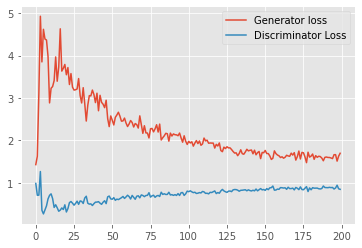

In [3]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib

from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

matplotlib.style.use('ggplot')

# learning parameters
batch_size = 512
epochs = 200
sample_size = 64 # fixed sample size
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])

to_pil_image = transforms.ToPILImage()

train_data = datasets.FashionMNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),

            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),

            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),

            nn.Linear(1024, 784),
            nn.Tanh(),
        )

    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),

            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),

            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),

            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)

print('##### GENERATOR #####')
print(generator)
print('######################')

print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

# loss function
criterion = nn.BCELoss()

losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)

# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)

# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

# function to train the discriminator network
def train_discriminator(optimizer, data_real, data_fake):
    b_size = data_real.size(0)
    real_label = label_real(b_size)
    fake_label = label_fake(b_size)

    optimizer.zero_grad()

    output_real = discriminator(data_real)
    loss_real = criterion(output_real, real_label)

    output_fake = discriminator(data_fake)
    loss_fake = criterion(output_fake, fake_label)


    loss_real.backward()
    loss_fake.backward()
    optimizer.step()

    return loss_real + loss_fake

# function to train the generator network
def train_generator(optimizer, data_fake):
    b_size = data_fake.size(0)
    real_label = label_real(b_size)

    optimizer.zero_grad()

    output = discriminator(data_fake)
    loss = criterion(output, real_label)

    loss.backward()
    optimizer.step()

    return loss    

# create the noise vector
noise = create_noise(sample_size, nz)

generator.train()
discriminator.train()

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        image, _ = data
        image = image.to(device)
        b_size = len(image)
        # run the discriminator for k number of steps
        for step in range(k):
            data_fake = generator(create_noise(b_size, nz)).detach()
            data_real = image
            # train the discriminator network
            loss_d += train_discriminator(optim_d, data_real, data_fake)
        data_fake = generator(create_noise(b_size, nz))
        # train the generator network
        loss_g += train_generator(optim_g, data_fake)

    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    # make the images as grid
    generated_img = make_grid(generated_img)
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"_output/gen_img{epoch}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

print('DONE TRAINING')
torch.save(generator.state_dict(), '_output/generator.pth')

# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('_output/generator_images.gif', imgs)

# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('_output/loss.png')